### Transform YOLO format to RetinaNet
This jupyter notebook is used to splitting the data and saving the data into seperate folders to be able to don't risk that inadvertently change in the datasets later in the process. The notebook creates two csv files with the annotation and class mapping as well. The split in train, val and test stayes the same as for Yolov5.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

In [5]:
def find_split(path_folder):
    X = []
    for file in os.listdir(path_folder):
        file = str(file).split(".")
        X.append(file[0])
    return X

path_train = "/Volumes/T7/Master/Data_augment/Yolov5/Request_da/labels/train"
path_val = "/Volumes/T7/Master/Data_augment/Yolov5/Request_da/labels/val"
path_test = "/Volumes/T7/Master/Data_augment/Yolov5/Request_da/labels/test"

#path_train = "/Volumes/T7/Master/datasets/Request/labels/train"
#path_val = "/Volumes/T7/Master/datasets/Request/labels/val"
#path_test = "/Volumes/T7/Master/datasets/Request/labels/test"

X_train_split = find_split(path_train)
X_val_split = find_split(path_val)
X_test_split = find_split(path_test)

print(len(X_test_split))

1811


In [6]:
def Dataframe_data(root_path):
    
    # Annotationsdata
    data = pd.read_csv(root_path + 'AnnotationsCollated.csv', delimiter=';', header=None)

    #Delete questionable
    image_type = data.iloc[:,5]

    index_list = []
    for index, row in image_type.iteritems():
        if row == 'Questionable':
            index_list.append(index)
    data = data.drop(index=index_list)
    display(data)

    # Name Dataframe
    names = data.iloc[:,3]
    number = data.iloc[:,4]

    names_concat = pd.concat([names, number], axis=1)
    names_concat.columns = ['Name', 'Number']
    names_concat['Name'] = names_concat['Name'].astype(str) + '_' + names_concat['Number'].astype(str)

    # Label Dataframe
    number_of_boxes = data.iloc[:,6]
    box = data.iloc[:,7]
    label_t_l = data.iloc[:,8]
    label_v_a = data.iloc[:,5]
    label_concat = pd.concat([names_concat, number_of_boxes, box, label_t_l, label_v_a], axis=1)

    return label_concat

root_path = '/Volumes/T7/ProcessedRequestData/ProcessedData/'
label = Dataframe_data(root_path)
print(label)

,0,1,2,3,4,5,6,7,8
0,Patient1,Case1,MeasurementSet1,eda1fb4b-0902-4cd1-837c-bddd221fddb6,63,Unknown,0,[],[]
1,Patient1,Case1,MeasurementSet2,ce699728-7891-4af5-bb0c-ce4067f65a89,16,Aorta,1,"[[(2, 26), (232, 527)]]",['T']
2,Patient1,Case1,MeasurementSet3,8b8aa37a-3905-4753-bb0b-f7b7661bc40a,37,Aorta,1,"[[(5, 30), (229, 520)]]",['T']
3,Patient1,Case1,MeasurementSet4,f7f27ea3-b1e5-49e0-ad52-29bb2c4c58f2,37,Unknown,0,[],[]
4,Patient1,Case1,MeasurementSet5,3fc88f9a-11de-4de8-813c-de2095d41eb7,37,Unknown,0,[],[]
...,...,...,...,...,...,...,...,...,...
14741,Patient184,Case1,MeasurementSet1,73c6d87e-a203-4ed7-9342-8b0ff88e2825,31,Unknown,0,[],[]
14742,Patient184,Case1,MeasurementSet2,909bd4a8-f27b-4af2-ae3c-5288db32f1f3,58,Unknown,0,[],[]
14743,Patient184,Case1,MeasurementSet3,60f1babb-72a5-4d62-b966-783caeb6c07d,77,Unknown,0,[],[]
14744,Patient184,Case1,MeasurementSet4,959c8ab2-7426-492a-be16-b02d61f2b0ed,37,Unknown,0,[],[]


                                          Name  Number  6  \
0      eda1fb4b-0902-4cd1-837c-bddd221fddb6_63      63  0   
1      ce699728-7891-4af5-bb0c-ce4067f65a89_16      16  1   
2      8b8aa37a-3905-4753-bb0b-f7b7661bc40a_37      37  1   
3      f7f27ea3-b1e5-49e0-ad52-29bb2c4c58f2_37      37  0   
4      3fc88f9a-11de-4de8-813c-de2095d41eb7_37      37  0   
...                                        ...     ... ..   
14741  73c6d87e-a203-4ed7-9342-8b0ff88e2825_31      31  0   
14742  909bd4a8-f27b-4af2-ae3c-5288db32f1f3_58      58  0   
14743  60f1babb-72a5-4d62-b966-783caeb6c07d_77      77  0   
14744  959c8ab2-7426-492a-be16-b02d61f2b0ed_37      37  0   
14746  3b299dd3-6c92-4dda-aebf-f3787bd0fedf_37      37  1   

                             7      8        5  
0                           []     []  Unknown  
1      [[(2, 26), (232, 527)]]  ['T']    Aorta  
2      [[(5, 30), (229, 520)]]  ['T']    Aorta  
3                           []     []  Unknown  
4                     

In [7]:
def find_x_y(X, df):
    X = list(X)
    df2 = df[df["Name"].isin(X)]
    df2.columns = ["Name", "Number", "object", "box", "TL", "label"]

    X_final = list(df2["Name"])
    y_final = pd.concat([df2["object"], df2["box"], df2["TL"], df2["label"]], axis=1)


    return X_final, y_final

X_train, y_train = find_x_y(X_train_split, label)
X_val, y_val = find_x_y(X_val_split, label)
X_test, y_test = find_x_y(X_test_split, label)

In [23]:
def images_da(root_path):
    image_dict = {}

    for filename in os.listdir(root_path):
        filename = filename.split(".")
        image_dict[filename[0]] = f'{root_path}/{filename[0]}.png'
    return image_dict

path = "/Volumes/T7/Master/Data_augment/PNGImages"
img_dict = images_da(path)

94dadefe-460b-43d4-89e8-0cac24a14e90_52


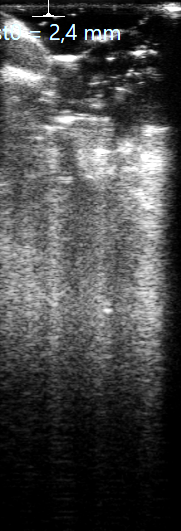

In [19]:
def actual_images(root_path):
    #Imagedata
    image_dict = {}

    # root = working directory, dirs = name of any sub_directories, files = present files in working directory
    for root, dirs, files in os.walk(root_path):
        pathfolder = os.path.basename(root)

        #Only go through folders that starts with MeasurementSet
        if pathfolder.startswith('MeasurementSet'):
            for image in files:

                #Add all the png files directories to a dict called image_dict
                if (image.endswith(".png")):
                    image_dict[os.path.splitext(image)[0]] = f'{root}/{image}'
    return image_dict

image_dict = actual_images(root_path)
print(random.choice(list(image_dict)))

# plot a random image
im = Image.open(random.choice(list(image_dict.values())))
display(im)

In [10]:
def csv_mapping(csv_path):
    with open(csv_path, "w") as class_mapping:
        class_mapping.write("Transversal,0\n")
        class_mapping.write("Longitudinal,1\n")
        class_mapping.write("Vessel,2\n")
        class_mapping.write("Anastomosis,3\n")
        class_mapping.write("Aorta,4\n")
    class_mapping.close()

csv_path = "/Volumes/T7/Master/Data_augment/RetinaNet/datasets_da/classes.csv"
#csv_path="/Volumes/T7/Master/RetinaNet/Request/datasets/classes.csv"
csv_mapping(csv_path)

In [24]:
def csv_annotation_classes(csv_path, image_dict, X, y):
    with open(csv_path, "w") as annotations:
        for image, label in zip(X, y.values):
            for key, value in image_dict.items():
                if image == key:
                    path = value

            img = Image.open(f'{path}')
            height = img.height
            width = img.width

            if label[3] == "Unknown" or label[3] == "Questionable" or label[3] == "Blank":
                annotations.write(f"{path},,,,,\n")
            elif label[0] == 0:
                annotations.write(f"{path},,,,,\n")
            else:
                # Replace the string with right characters and reshape. 
                box = label[1].replace("(", "").replace("[", "").replace(")", "").replace("]", "").replace(" ", "").split(",")
                box_array = np.array([int(character) for character in box]).reshape(label[0], 4)
                
                #Transversal or Longitudinal
                char_label = label[2].replace("[", "").replace("]", "").replace("'", "").replace(" ", "").replace("T","Transversal").replace("L","Longitudinal").split(",")
                label_array = np.array([character for character in char_label]).reshape(label[0], 1) 

                #Vessel, Anastomosis or Aorta
                type_label = label[3].replace("", "").replace(" ", "").split(",")  
                type_array = np.array([np.repeat(typ, label[0]) for typ in type_label]).reshape(label[0], 1)

                for label_1, label_2, box_element in zip(label_array, type_array, box_array):

                    #Fix boxes that are out of bound + boxes that are turned around
                    x1 = box_element[0]
                    y1 = box_element[1]
                    x2 = box_element[2]
                    y2 = box_element[3]

                    if box_element[2] > width:
                        x2 = width
                    if box_element[2] < 0:
                        x2 = 0
                    if box_element[0] < 0:
                        x1 = 0

                    
                    if box_element[0] > box_element[2]:
                        x1 = box_element[2]
                        x2 = box_element[0]
                    if box_element[1] > box_element[3]:
                        y2 = box_element[1]
                        y1 = box_element[3]


                    if x1 < 0:
                        x1 = 0
                    if x2 < 0:
                        x2 = 0
                    if y1 < 0:
                        y1 = 0
                    if y2 < 0:
                        y2 = 0

                    if box_element[0] == box_element[2]:
                        annotations.write(f"{path},,,,,\n")
                    else:
                        annotations.write(f'{path},{x1},{y1},{x2},{y2},{label_1[0]}\n')
                        annotations.write(f'{path},{x1},{y1},{x2},{y2},{label_2[0]}\n')
        
    annotations.close()
    

#Make Annotation csv for train, val, test
#train_csv="/Volumes/T7/Master/Data_augment/RetinaNet/datasets_da/train_annotations.csv"
#val_csv="/Volumes/T7/Master/Data_augment/RetinaNet/datasets_da/val_annotations.csv"
#test_csv="/Volumes/T7/Master/Data_augment/RetinaNet/datasets_da/test_annotations.csv"

train_csv="/Volumes/T7/Master/RetinaNet/Request/datasets/train_annotations.csv"
val_csv="/Volumes/T7/Master/RetinaNet/Request/datasets/val_annotations.csv"
test_csv="/Volumes/T7/Master/RetinaNet/Request/datasets/test_annotations.csv"

csv_annotation_classes(train_csv, img_dict, X_train, y_train)
csv_annotation_classes(val_csv, img_dict, X_val, y_val)
csv_annotation_classes(test_csv, img_dict, X_test, y_test)
#csv_annotation_classes(train_csv, image_dict, X_train, y_train)
#csv_annotation_classes(val_csv, image_dict, X_val, y_val)
#csv_annotation_classes(test_csv, image_dict, X_test, y_test)